In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from utils.masks import extract_masks, binarize, resample_mask
from utils.images import normalize, resample_img
from utils.registration import est_lin_transf, apply_lin_transf, est_nl_transf, apply_nl_transf, seg_atlas
from utils.plot_methods import plot_transf, plot_atlas_seg

## Project 2

### Task 1 Atlas Creation

In [15]:
## Extract masks for common dataset

# Lists of masks
masks = ['./data/common_40_mask.nii.gz',
         './data/common_41_mask.nii.gz',
         './data/common_42_mask.nii.gz']

mov_masks_paths = ['./data/g1_53_mask_3_1.nii.gz',
                  './data/g1_54_mask_3_1.nii.gz',
                  './data/g1_55_mask_3_1.nii.gz']

# Left femur - label 2, Left hip bone - label 4
labels = [2] 

# Extract masks
extract_masks(mov_masks_paths, labels)

The new mask is saved as './data/g1_53_mask_3_1_2.nii.gz'.
The new mask is saved as './data/g1_54_mask_3_1_2.nii.gz'.
The new mask is saved as './data/g1_55_mask_3_1_2.nii.gz'.


Text(0.5, 1.0, 'Image and the new mask')

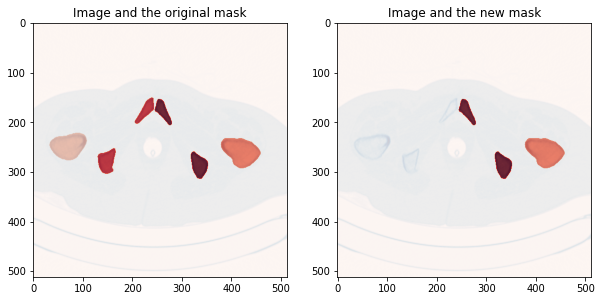

In [3]:
## Plot the extracted masks for one subject

# Load images
fix_img = sitk.ReadImage('./data/common_42_image.nii.gz', sitk.sitkFloat32)
fix_mask = sitk.ReadImage('./data/common_42_mask.nii.gz', sitk.sitkFloat32)
mask_new = sitk.ReadImage('./data/common_42_mask_4_2.nii.gz', sitk.sitkFloat32)

fix_img_data = sitk.GetArrayFromImage(fix_img)
fix_mask_data = sitk.GetArrayFromImage(fix_mask)
mask_new_data = sitk.GetArrayFromImage(mask_new)

# Plot original masks and extracted masks
idx = 30
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(fix_mask_data[idx], cmap = 'Reds', alpha = 0.8)
plt.title('Image and the original mask')

plt.subplot(122)
plt.imshow(fix_img_data[idx], cmap='Blues') # fixed image
plt.imshow(mask_new_data[idx], cmap = 'Reds', alpha = 0.8)
plt.title('Image and the new mask')

### Task 3 Atlas based-segmentation: (40%)

#### Linear Registration

--------
Linear registration:
Final mean squares value: 120953.1895038224
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Number of iterations: 14
--------
--------
Linear registration:
Final mean squares value: 131546.59586721694
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 64.
Number of iterations: 64
--------
--------
Linear registration:
Final mean squares value: 123548.61307571859
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Number of iterations: 32
--------


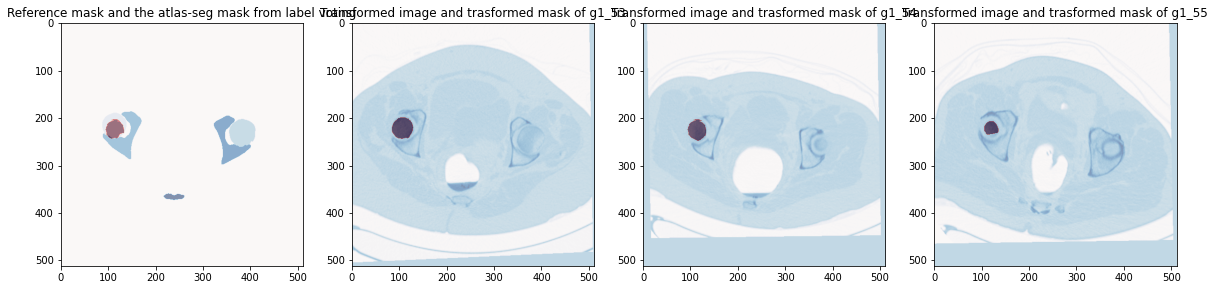

--------
Linear registration:
Final mean squares value: 162145.7167711204
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 31.
Number of iterations: 31
--------
--------
Linear registration:
Final mean squares value: 150946.3894726403
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Number of iterations: 12
--------
--------
Linear registration:
Final mean squares value: 150875.46401389924
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 78.
Number of iterations: 78
--------


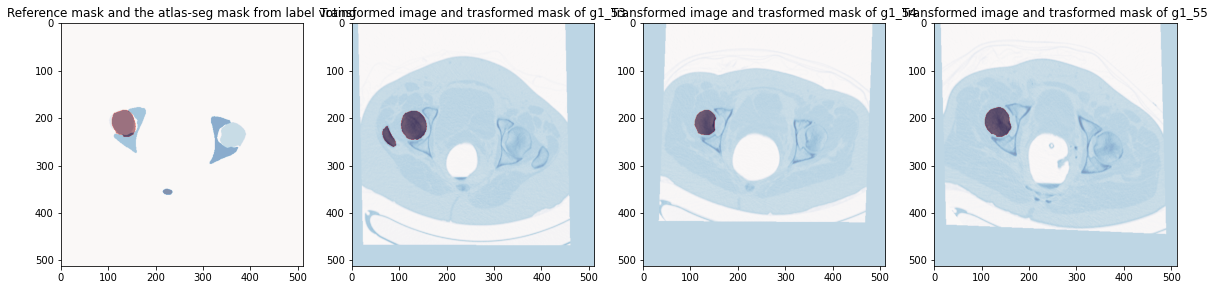

--------
Linear registration:
Final mean squares value: 140263.3174998639
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 33.
Number of iterations: 33
--------
--------
Linear registration:
Final mean squares value: 151853.37644559192
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Number of iterations: 32
--------
--------
Linear registration:
Final mean squares value: 155919.89903077838
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 48.
Number of iterations: 48
--------


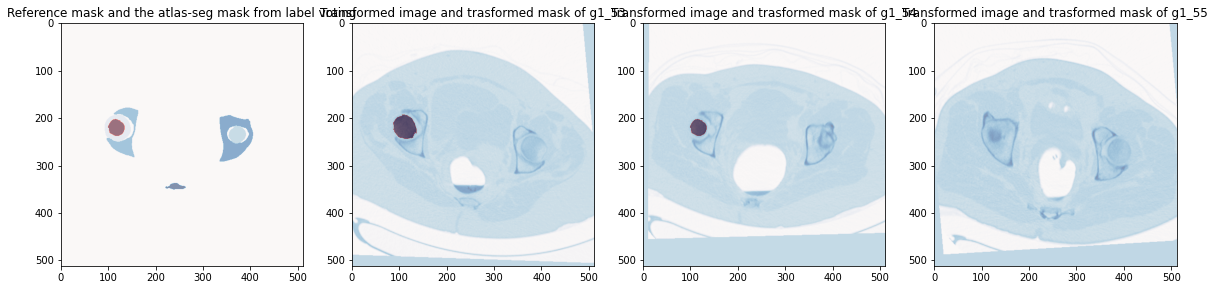

--------
Linear registration:
Final mean squares value: 124583.73009942682
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 60.
Number of iterations: 60
--------
--------
Linear registration:
Final mean squares value: 156078.6119482365
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 36.
Number of iterations: 36
--------
--------
Linear registration:
Final mean squares value: 132420.53161137656
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Number of iterations: 22
--------


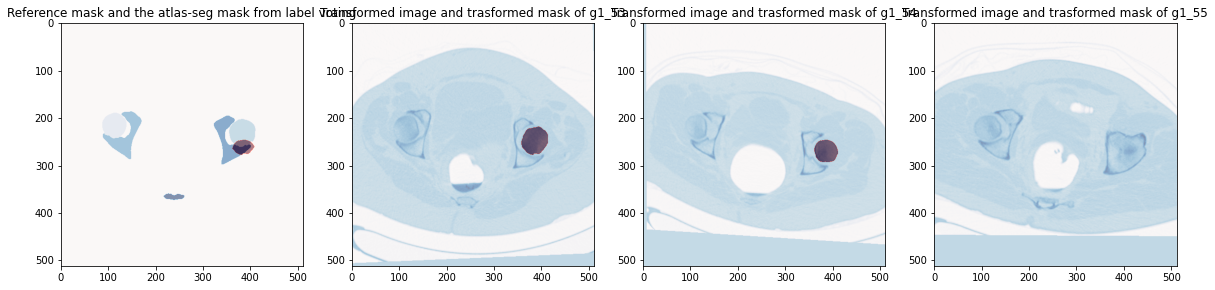

--------
Linear registration:
Final mean squares value: 162464.79929311207
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 50.
Number of iterations: 50
--------
--------
Linear registration:
Final mean squares value: 161605.09694931025
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 69.
Number of iterations: 69
--------
--------
Linear registration:
Final mean squares value: 176191.96670560093
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Number of iterations: 21
--------


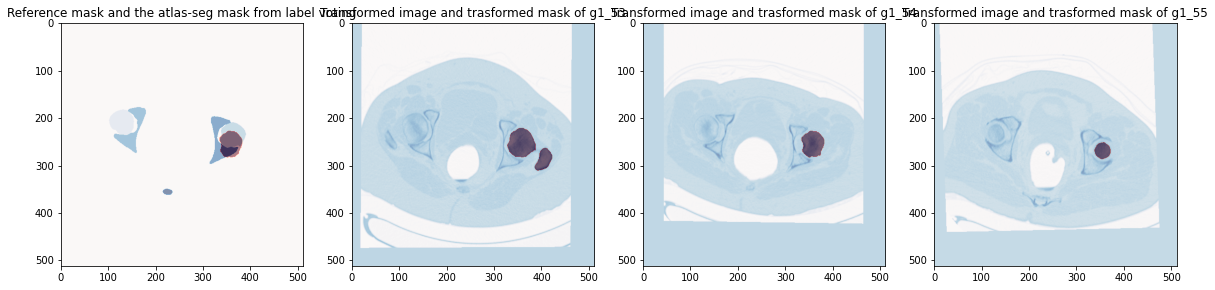

--------
Linear registration:
Final mean squares value: 101475.52991541276
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 51.
Number of iterations: 51
--------
--------
Linear registration:
Final mean squares value: 122412.64929931995
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 42.
Number of iterations: 42
--------
--------
Linear registration:
Final mean squares value: 162232.13407467367
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Number of iterations: 22
--------


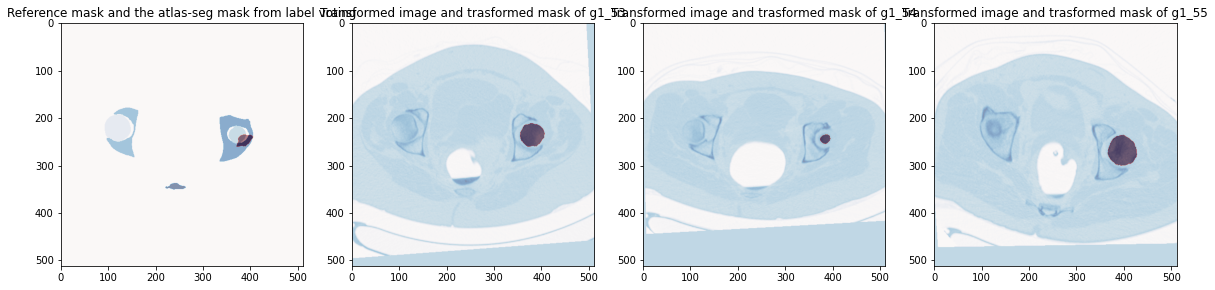

--------
Linear registration:
Final mean squares value: 132365.02852930757
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 40.
Number of iterations: 40
--------
--------
Linear registration:
Final mean squares value: 153255.7044178156
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 28.
Number of iterations: 28
--------
--------
Linear registration:
Final mean squares value: 146089.87155118174
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Number of iterations: 12
--------


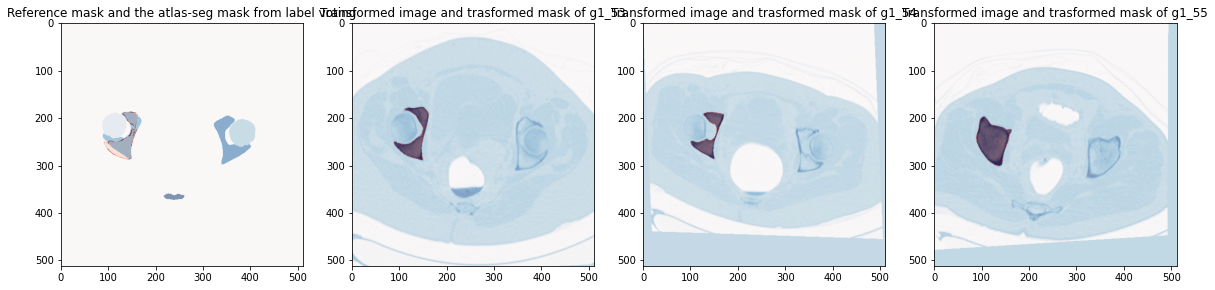

--------
Linear registration:
Final mean squares value: 189000.50335761873
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Number of iterations: 20
--------
--------
Linear registration:
Final mean squares value: 149709.10274488828
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Number of iterations: 20
--------
--------
Linear registration:
Final mean squares value: 159677.82168562734
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 47.
Number of iterations: 47
--------


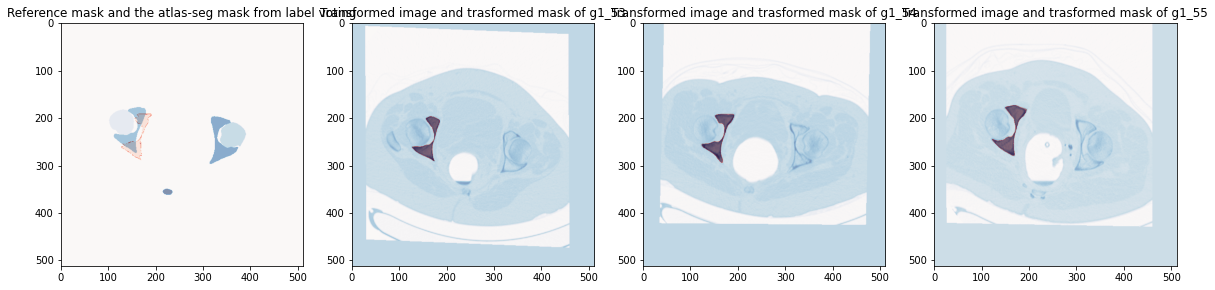

--------
Linear registration:
Final mean squares value: 111642.55923797606
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 36.
Number of iterations: 36
--------
--------
Linear registration:
Final mean squares value: 109470.99338487431
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 57.
Number of iterations: 57
--------
--------
Linear registration:
Final mean squares value: 150386.95779032115
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 30.
Number of iterations: 30
--------


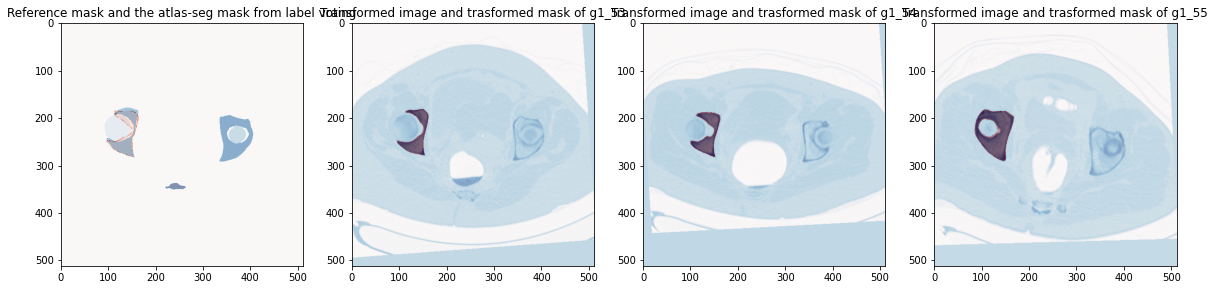

--------
Linear registration:
Final mean squares value: 120307.78276184737
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Number of iterations: 24
--------
--------
Linear registration:
Final mean squares value: 124148.2108445381
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 31.
Number of iterations: 31
--------
--------
Linear registration:
Final mean squares value: 134145.09571543615
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 16.
Number of iterations: 16
--------


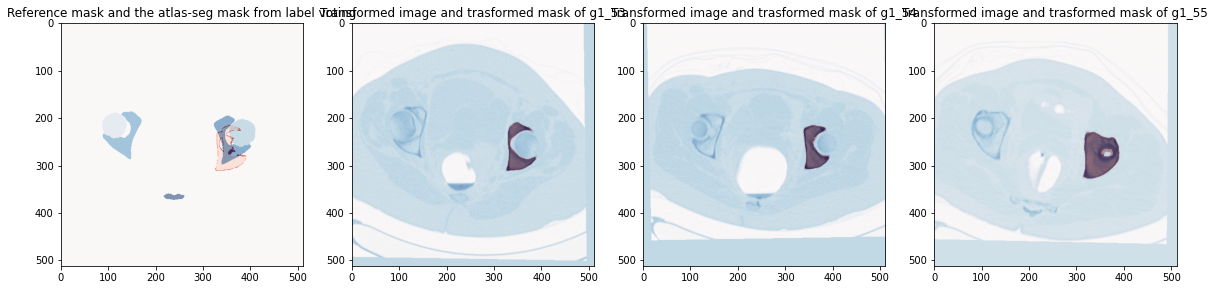

--------
Linear registration:
Final mean squares value: 147786.40384701177
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 44.
Number of iterations: 44
--------
--------
Linear registration:
Final mean squares value: 190315.64665527895
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 33.
Number of iterations: 33
--------
--------
Linear registration:
Final mean squares value: 175179.9165445963
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 73.
Number of iterations: 73
--------


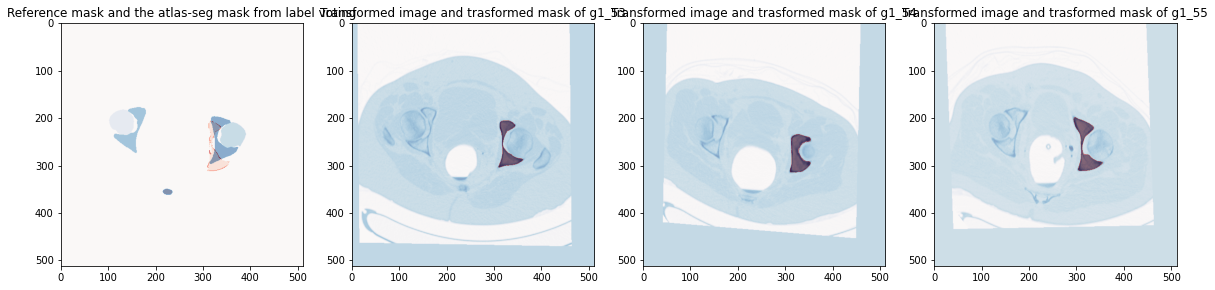

--------
Linear registration:
Final mean squares value: 111916.58279955541
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 48.
Number of iterations: 48
--------
--------
Linear registration:
Final mean squares value: 161786.59669178844
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Number of iterations: 21
--------
--------
Linear registration:
Final mean squares value: 166427.1590725806
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 25.
Number of iterations: 25
--------


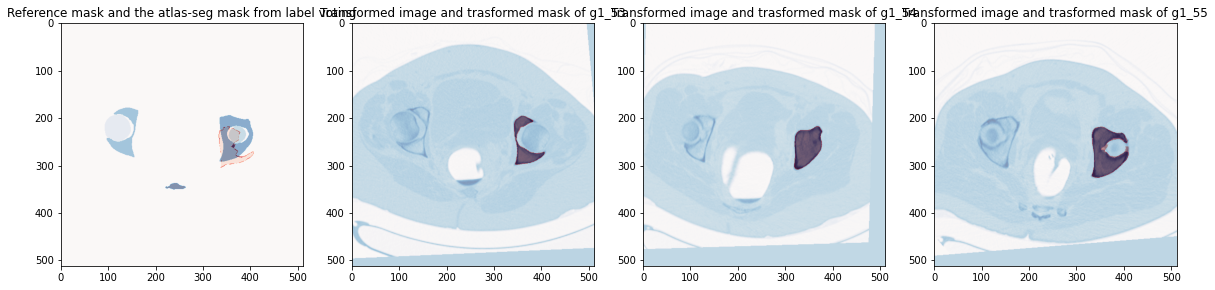

In [25]:
# If resample and normalize the images to be in the same size
resmaple = True
normal = False
bones = ['r_femur', 'l_femur', 'r_hip', 'l_hip']
common = [40, 41, 42]
group = [53, 54, 55]

for id_b in range(len(bones)):

    for i in range(len(common)):

        lin_masks = []
        lin_imgs = []

        # Load reference image and mask
        fix_img = sitk.ReadImage('./data/common_{0}_image.nii.gz'.format(common[i]), sitk.sitkFloat32)
        fix_mask = sitk.ReadImage('./data/common_{0}_mask.nii.gz'.format(common[i], id_b+1), sitk.sitkFloat32)
        
        for j in range(len(group)):
            # Load moving image and mask
            mov_img = sitk.ReadImage('./data/g1_{0}_image.nii.gz'.format(group[j]), sitk.sitkFloat32)
            mov_mask = sitk.ReadImage('./data/g1_{0}_mask_{1}.nii.gz'.format(group[j],id_b+1), sitk.sitkFloat32)

            # Resample the images to be the same size
            # Normalize the images
            # Binarize the mask
            if resmaple:
                fix_img = resample_img(fix_img, out_size= [512,512,256])
                fix_mask = resample_mask(fix_mask, out_size= [512,512,256])
                mov_img = resample_img(mov_img, out_size= [512,512,256])
                mov_mask = resample_mask(mov_mask, out_size= [512,512,256])

            if normal:
                fix_img = normalize(fix_img)
                mov_img = normalize(mov_img)

            # Estimate Linear Registration
            lin_tranf = est_lin_transf(fix_img, fix_mask, mov_img)

            # Apply Registration to the moving image and mask
            mov_img_resampled = apply_lin_transf(fix_img, mov_img, lin_tranf)
            mov_mask_resampled = apply_lin_transf(fix_img, mov_mask, lin_tranf)
            lin_imgs.append(mov_img_resampled)
            lin_masks.append(sitk.Cast(mov_mask_resampled,sitk.sitkUInt8))

            # Plot the results
            x,y,z = 140, 250, 450
            # plot_transf(fix_img, fix_mask, mov_img, mov_img_resampled, x, y, z)

        # Apply atlas segmentation and save the image
        est_lin_mask = seg_atlas(lin_masks)
        est_lin_mask_path = './output/' + "common_{0}_".format(common[i]) + "fm_lin_est_{}_mask.nii.gz".format(bones[id_b])
        sitk.WriteImage(est_lin_mask, est_lin_mask_path)

        # Plot the atlas segmentation results
        idx = 80
        plot_atlas_seg(est_lin_mask, fix_mask, lin_imgs, lin_masks, idx)
        

### Registration

--------
Linear registration:
Final mean squares value: 133696.91451656778
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 19.
Number of iterations: 19
--------
--------
Demons registration:
Final metric value: 82759.76884307172
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 28.
Number of iterations: 28
--------
--------
Linear registration:
Final mean squares value: 120497.81876779071
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 50.
Number of iterations: 50
--------
--------
Demons registration:
Final metric value: 72177.42993360948
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 27.
Number of iterations: 27
--------
--------
Linear registration:
Final mean squares value: 129202.01343413806
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence check

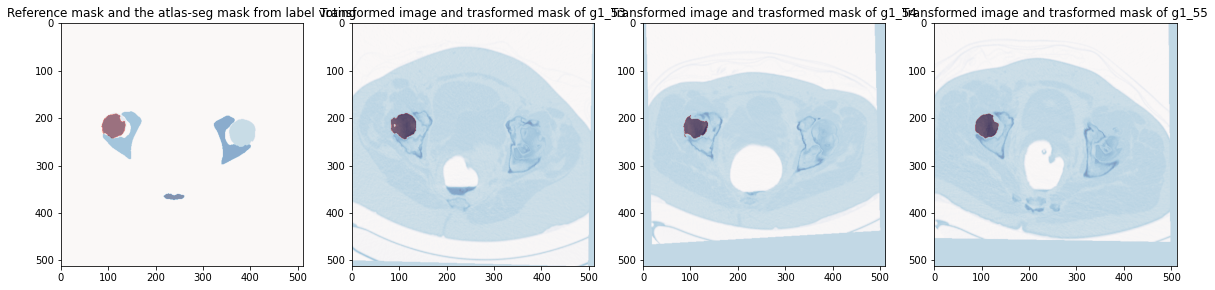

--------
Linear registration:
Final mean squares value: 144306.21354304507
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 33.
Number of iterations: 33
--------
--------
Demons registration:
Final metric value: 90733.24157299056
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Number of iterations: 24
--------
--------
Linear registration:
Final mean squares value: 155870.9607588438
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Number of iterations: 23
--------
--------
Demons registration:
Final metric value: 96279.02991973593
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 24.
Number of iterations: 24
--------
--------
Linear registration:
Final mean squares value: 202468.06339908062
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checke

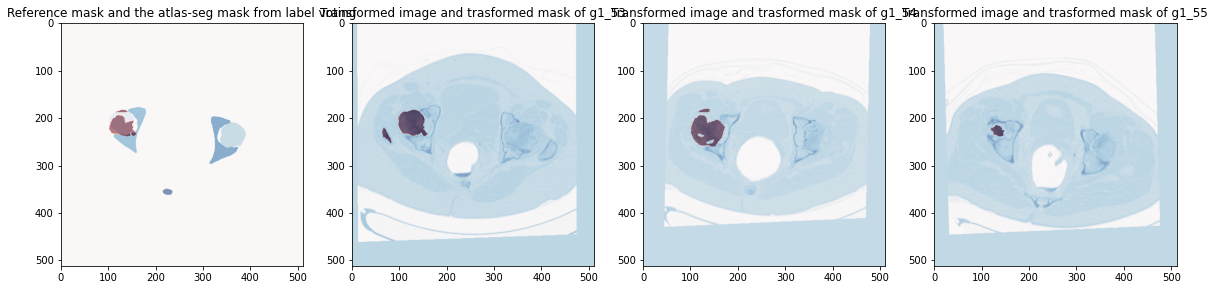

--------
Linear registration:
Final mean squares value: 107872.29480503686
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 58.
Number of iterations: 58
--------
--------
Demons registration:
Final metric value: 50368.15575612646
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 44.
Number of iterations: 44
--------
--------
Linear registration:
Final mean squares value: 159013.74849644865
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Number of iterations: 21
--------
--------
Demons registration:
Final metric value: 115186.6845708309
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 33.
Number of iterations: 33
--------
--------
Linear registration:
Final mean squares value: 152386.39633184837
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence check

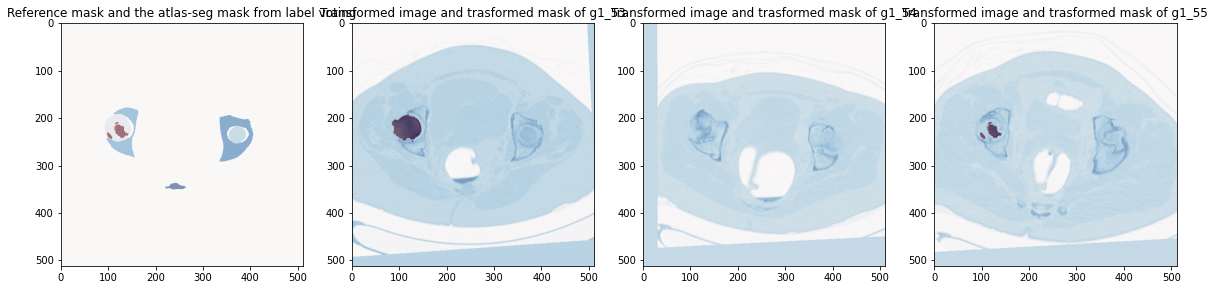

--------
Linear registration:
Final mean squares value: 121866.01630748415
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Number of iterations: 32
--------
--------
Demons registration:
Final metric value: 76657.03800482438
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 30.
Number of iterations: 30
--------
--------
Linear registration:
Final mean squares value: 116044.16640958595
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 89.
Number of iterations: 89
--------
--------
Demons registration:
Final metric value: 55219.99071801935
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 35.
Number of iterations: 35
--------
--------
Linear registration:
Final mean squares value: 132096.72527321015
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence check

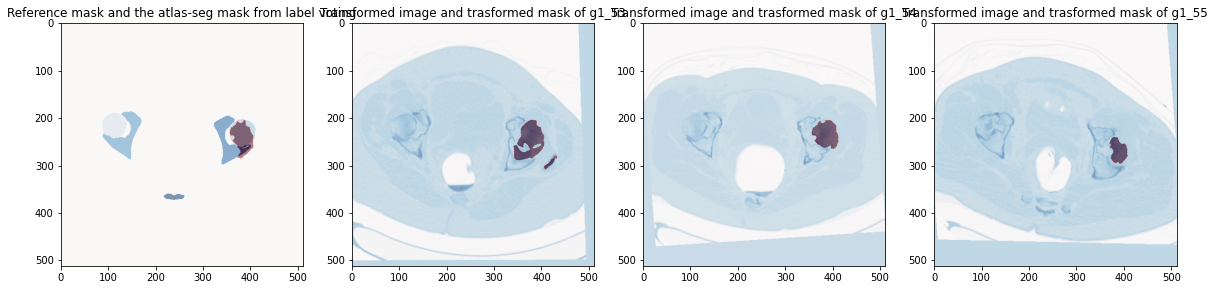

--------
Linear registration:
Final mean squares value: 179767.9689898101
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 26.
Number of iterations: 26
--------
--------
Demons registration:
Final metric value: 105105.66487472225
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Number of iterations: 18
--------
--------
Linear registration:
Final mean squares value: 171600.3156399825
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 38.
Number of iterations: 38
--------
--------
Demons registration:
Final metric value: 121721.85257480947
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Number of iterations: 23
--------
--------
Linear registration:
Final mean squares value: 181715.09350102954
Optimizer stop condition: GradientDescentOptimizerv4Template: Maximum number of

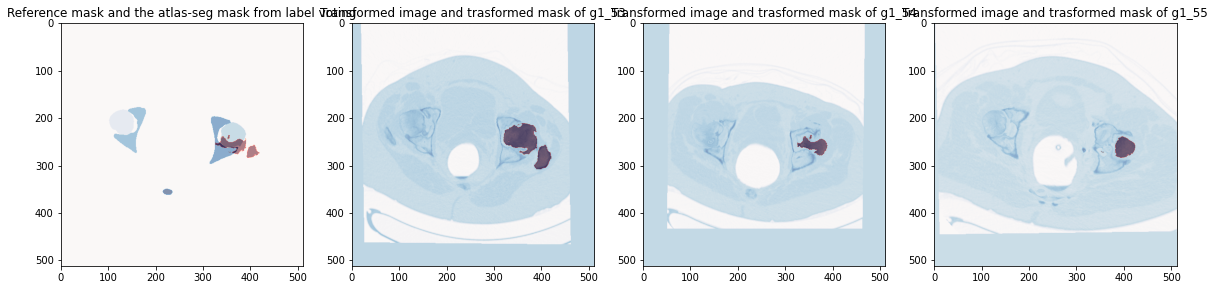

--------
Linear registration:
Final mean squares value: 115191.85327022758
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Number of iterations: 32
--------
--------
Demons registration:
Final metric value: 48202.58721813974
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 44.
Number of iterations: 44
--------
--------
Linear registration:
Final mean squares value: 122125.93794177922
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 58.
Number of iterations: 58
--------
--------
Demons registration:
Final metric value: 55771.9086726185
Optimizer stop condition: GradientDescentOptimizerv4Template: Maximum number of iterations (50) exceeded.
Number of iterations: 50
--------
--------
Linear registration:
Final mean squares value: 138033.08095942935
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checke

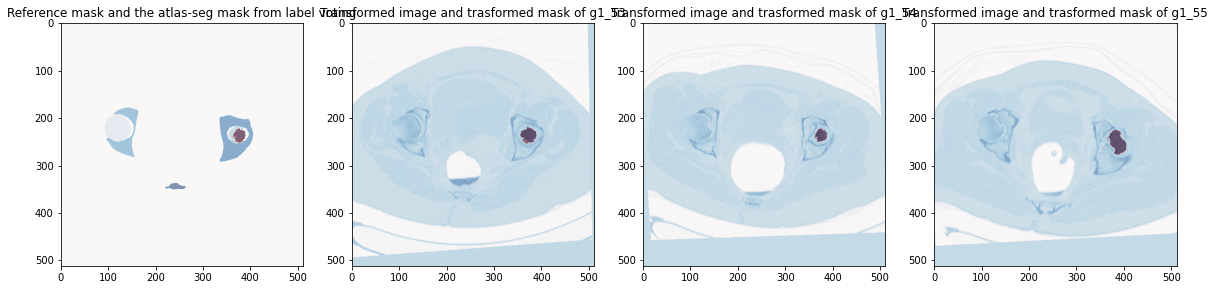

--------
Linear registration:
Final mean squares value: 128349.75437336045
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 10.
Number of iterations: 10
--------
--------
Demons registration:
Final metric value: 81829.9594153029
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 34.
Number of iterations: 34
--------
--------
Linear registration:
Final mean squares value: 123308.98579652687
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 32.
Number of iterations: 32
--------
--------
Demons registration:
Final metric value: 64532.131037034516
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 43.
Number of iterations: 43
--------
--------
Linear registration:
Final mean squares value: 145974.5045625718
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checke

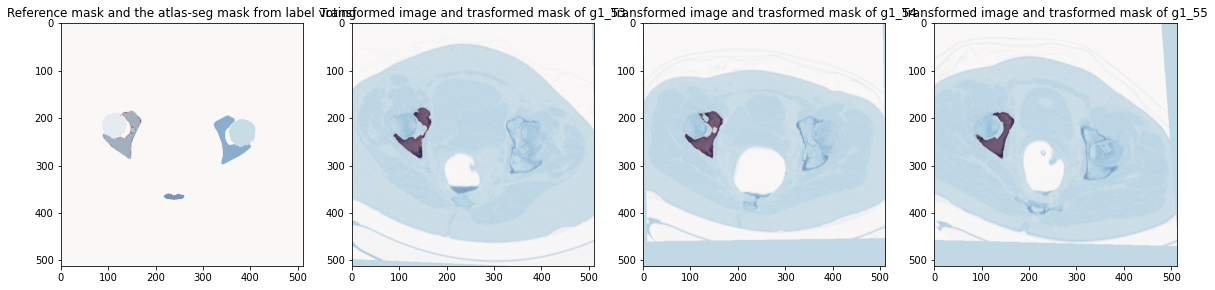

--------
Linear registration:
Final mean squares value: 164477.0907396383
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 23.
Number of iterations: 23
--------
--------
Demons registration:
Final metric value: 95765.23383285942
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Number of iterations: 22
--------
--------
Linear registration:
Final mean squares value: 147190.56140896463
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Number of iterations: 22
--------
--------
Demons registration:
Final metric value: 84163.53233413366
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Number of iterations: 18
--------
--------
Linear registration:
Final mean squares value: 154655.04706392175
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checke

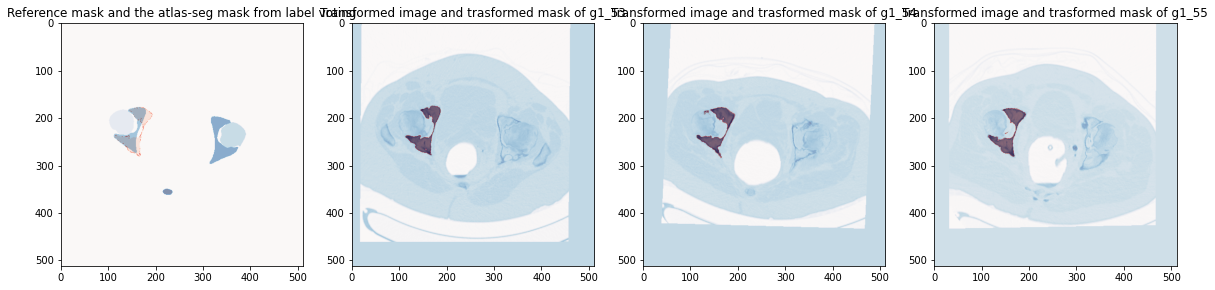

--------
Linear registration:
Final mean squares value: 123249.70062670577
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 28.
Number of iterations: 28
--------
--------
Demons registration:
Final metric value: 47992.00724423913
Optimizer stop condition: GradientDescentOptimizerv4Template: Maximum number of iterations (50) exceeded.
Number of iterations: 50
--------
--------
Linear registration:
Final mean squares value: 121325.00151885486
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Number of iterations: 22
--------
--------
Demons registration:
Final metric value: 48789.13205183855
Optimizer stop condition: GradientDescentOptimizerv4Template: Maximum number of iterations (50) exceeded.
Number of iterations: 50
--------
--------
Linear registration:
Final mean squares value: 129896.6420206933
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checke

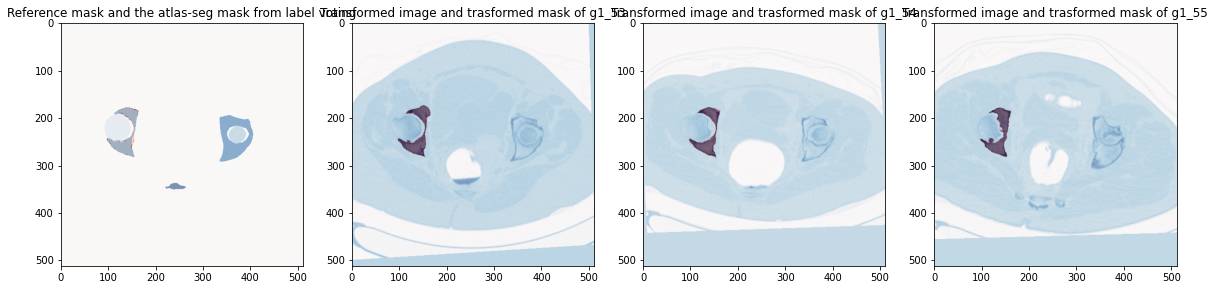

--------
Linear registration:
Final mean squares value: 116955.71083968911
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 63.
Number of iterations: 63
--------
--------
Demons registration:
Final metric value: 68396.33625211363
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 42.
Number of iterations: 42
--------
--------
Linear registration:
Final mean squares value: 137287.96701843958
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 64.
Number of iterations: 64
--------
--------
Demons registration:
Final metric value: 86119.13546696275
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 45.
Number of iterations: 45
--------
--------
Linear registration:
Final mean squares value: 115228.82233498259
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence check

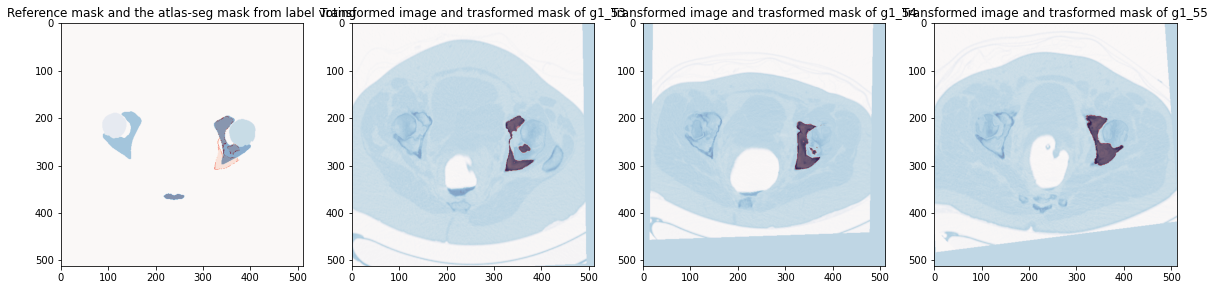

--------
Linear registration:
Final mean squares value: 177348.73164065587
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 42.
Number of iterations: 42
--------
--------
Demons registration:
Final metric value: 138686.58121693795
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 20.
Number of iterations: 20
--------
--------
Linear registration:
Final mean squares value: 145176.784740608
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 63.
Number of iterations: 63
--------
--------
Demons registration:
Final metric value: 99351.80210026678
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 22.
Number of iterations: 22
--------
--------
Linear registration:
Final mean squares value: 156358.798829007
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker 

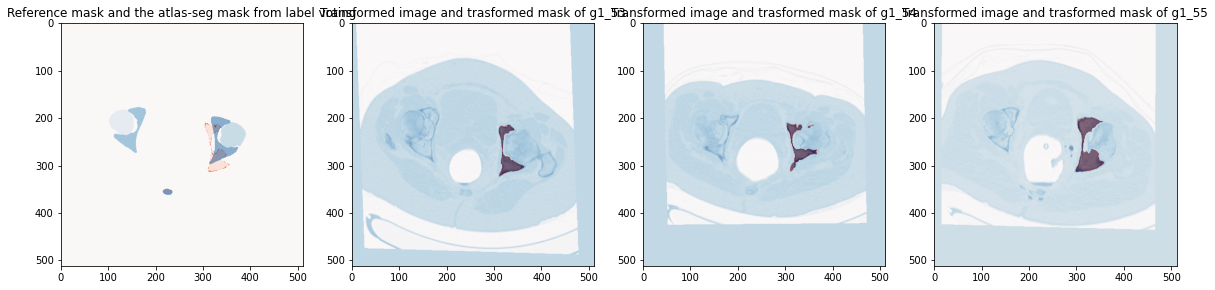

--------
Linear registration:
Final mean squares value: 108170.9891591242
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 94.
Number of iterations: 94
--------
--------
Demons registration:
Final metric value: 66512.1648105491
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 34.
Number of iterations: 34
--------
--------
Linear registration:
Final mean squares value: 115772.19274248758
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker passed at iteration 29.
Number of iterations: 29
--------
--------
Demons registration:
Final metric value: 50317.27729380705
Optimizer stop condition: GradientDescentOptimizerv4Template: Maximum number of iterations (50) exceeded.
Number of iterations: 50
--------
--------
Linear registration:
Final mean squares value: 142379.9407304231
Optimizer stop condition: GradientDescentOptimizerv4Template: Convergence checker 

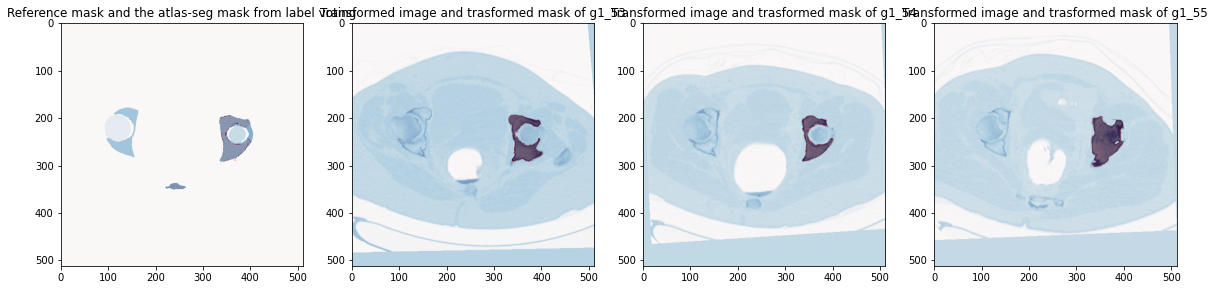

In [2]:
# If resample and normalize the images to be in the same size
resmaple = True
normal = False
bones = ['r_femur', 'l_femur', 'r_hip', 'l_hip']
common = [40, 41, 42]
group = [53, 54, 55]

for id_b in range(len(bones)):

    for i in range(len(common)):

        reg_masks = []
        reg_imgs = []

        # Load reference image and mask
        fix_img = sitk.ReadImage('./data/common_{0}_image.nii.gz'.format(common[i]), sitk.sitkFloat32)
        fix_mask = sitk.ReadImage('./data/common_{0}_mask.nii.gz'.format(common[i], id_b+1), sitk.sitkFloat32)
        
        for j in range(len(group)):
            # Load moving image and mask
            mov_img = sitk.ReadImage('./data/g1_{0}_image.nii.gz'.format(group[j]), sitk.sitkFloat32)
            mov_mask = sitk.ReadImage('./data/g1_{0}_mask_{1}.nii.gz'.format(group[j],id_b+1), sitk.sitkFloat32)

            # Resample the images to be the same size
            # Normalize the images
            # Binarize the mask
            if resmaple:
                fix_img = resample_img(fix_img, out_size= [512,512,256])
                fix_mask = resample_mask(fix_mask, out_size= [512,512,256])
                mov_img = resample_img(mov_img, out_size= [512,512,256])
                mov_mask = resample_mask(mov_mask, out_size= [512,512,256])

            if normal:
                fix_img = normalize(fix_img)
                mov_img = normalize(mov_img)

            # Linear Registration
            lin_transf = est_lin_transf(fix_img, fix_mask, mov_img)
            lin_mov_img = apply_lin_transf(fix_img, mov_img, lin_transf)
            lin_mov_mask = apply_lin_transf(fix_img, mov_mask, lin_transf)

            # Demon Regisrtaion
            nl_transf = est_nl_transf(fix_img, lin_mov_img, fix_mask)
            nl_mov_img = apply_nl_transf(fix_img, lin_mov_img, nl_transf)
            nl_mov_mask = apply_nl_transf(fix_img, lin_mov_mask, nl_transf)

            reg_imgs.append(nl_mov_img)
            reg_masks.append(sitk.Cast(nl_mov_mask,sitk.sitkUInt8))

            # Plot the results
            x,y,z = 140, 250, 450
            # plot_transf(fix_img, fix_mask, mov_img, lin_mov_img, x, y, z)

        # Apply atlas segmentation and save the image
        est_lin_mask = seg_atlas(reg_masks)
        est_lin_mask_path = './output/reg/' + "common_{0}_".format(common[i]) + "fm_lin_est_{}_mask.nii.gz".format(bones[id_b])
        sitk.WriteImage(est_lin_mask, est_lin_mask_path)

        # Plot the atlas segmentation results
        idx = 80
        plot_atlas_seg(est_lin_mask, fix_mask, reg_imgs, reg_masks, idx)
        

### Task 4 Accuracy assessment: (10%)

In [3]:
# Define assesment method
def AccuracyAssess(ref, pred):

    labelTrue=ref
    labelPred=pred
    
    diceCoeff=sitk.LabelOverlapMeasuresImageFilter()
    diceCoeff.Execute(labelTrue>0.5,labelPred>0.5)

    hausDist=sitk.HausdorffDistanceImageFilter()
    hausDist.Execute(labelTrue>0.5,labelPred>0.5)

    print("Dice coefficient equal to ", diceCoeff.GetDiceCoefficient(), "; Hausdorff distance equal to ",  hausDist.GetHausdorffDistance())

In [4]:
for id_b in range(len(bones)): 
    for i in common:
        gt = sitk.ReadImage('./data/common_{0}_mask_{1}.nii.gz'.format(i,id_b+1), sitk.sitkFloat32)
        est_mask = sitk.ReadImage('./output/reg/common_{0}_fm_lin_est_{1}_mask.nii.gz'.format(i, bones[id_b]), sitk.sitkFloat32)
        gt = resample_mask(gt, out_size= [512,512,256])
        print("Evaluation of the mask for {0} of common {1} :".format(bones[id_b], i))
        AccuracyAssess(gt, sitk.Cast(est_mask,sitk.sitkUInt8))

Evaluation of the mask for r_femur of common 40 :
Dice coefficient equal to  0.8282343330569945 ; Hausdorff distance equal to  17.172390036652146
Evaluation of the mask for r_femur of common 41 :
Dice coefficient equal to  0.4759108395001518 ; Hausdorff distance equal to  22.060750697849468
Evaluation of the mask for r_femur of common 42 :
Dice coefficient equal to  0.6835400066369403 ; Hausdorff distance equal to  22.672893418299587
Evaluation of the mask for l_femur of common 40 :
Dice coefficient equal to  0.3046905985237455 ; Hausdorff distance equal to  31.628847284159168
Evaluation of the mask for l_femur of common 41 :
Dice coefficient equal to  0.39294268041852476 ; Hausdorff distance equal to  21.63153209544456
Evaluation of the mask for l_femur of common 42 :
Dice coefficient equal to  0.8405971274728123 ; Hausdorff distance equal to  14.359615105678824
Evaluation of the mask for r_hip of common 40 :
Dice coefficient equal to  0.8922097410226484 ; Hausdorff distance equal to 